# MOwNiT -  Iteracyjne metody rozwiązywania równań różniczkowych liniowych
### Autor: dr Katarzyna Rycerz
Przykład: Temperatura w stanie stacjonarnym 

Obliczyć rozkład temperatury na kwadratowej płytce w układzie o ustalonych temperaturach na brzegach (brzegi mają różną temperaturę)

Rozkład spełnia równanie Laplace'a

$\frac{\partial^2 	T(x,y)}{\partial x^2}+   \frac {\partial^2 	T(x,y)}{\partial y^2}=0$

Tworzymy rozwiązanie początkowe:
- siatka $n\times n$
- ustawiamy temperaturę na brzegach
- w środku, jako początkową wartość "zgadujemy" 0

In [12]:
import numpy as np

def create_initial_solution(n,hot_temp=100,cold_temp=10):
    T=np.zeros((n,n))
    # ustawienie warunków brzegowych
    T[0,:]=hot_temp
    T[-1,:]=hot_temp
    T[:,0]=hot_temp
    T[:,-1]=cold_temp
    return T

In [13]:
create_initial_solution(10)

array([[100., 100., 100., 100., 100., 100., 100., 100., 100.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  10.],
       [100., 100., 100., 100., 100., 100., 100., 100., 100.,  10.]])

Metoda Jakobiego, wzór roboczy $$x_i^{(t+1)}=\frac{1}{a_{ii}}[b_i-\sum_{j=1,j\neq i}^{n} a_{ij}x_j^{(t)}]\  ;\  a_{ii} \neq 0, \forall i \in {1,..,n} $$

Dla równania Laplace'a przyjmuje postać:
$$
		  T^{(t+1)}(x_i,y_j)=
	\frac{T^{(t)}(x_{i},y_{j-1})  + T^{(t)}(x_{i-1}, y_j)
	  +T^{(t)}(x_{i+1},y_{j})
	 +T^{(t)}(x_{i},y_{j+1})}{4} 
	 $$

Uwaga: w kodzie poniżej przyjęto kryterium stopu $|| x_{i+1}-x_{i} || $

In [14]:
def jacobi_laplace(T,maxiter=1000,tol=1e-6):
    n = np.shape(T)[0]  
    m = np.shape(T)[1]
    
    #tablica, gdzie będziemy zapisywać nową iterację
    T_next=T.copy()

    for iter in range(maxiter):
        delta = 0.0
        # Aktualizacja wewnętrznych punktów siatki
        for j in range(1,n-1):
            for i in range(1,m-1):
                # wzór roboczy 
                T_next[i,j] = 0.25 * (T[i-1,j] + T[i+1,j] +  T[i,j-1] + T[i,j+1])
                # największa poprawa w tej iteracji 
                delta = max(delta, abs(T_next[i,j] - T[i,j]))
        # Zamiana macierzy bez kopiowania danych
        T, T_next = T_next, T
        
        # Sprawdzenie warunku zbieżności
        if delta < tol:
            print(f"Zbieżność osiągnięta po {iter} iteracjach")
            return T
    print("Osiągnięto maksymalną liczbę iteracji")
    return T


In [15]:
T=create_initial_solution(10)
solution = jacobi_laplace(T)

print(solution)

Zbieżność osiągnięta po 254 iteracjach
[[100.         100.         100.         100.         100.
  100.         100.         100.         100.          10.        ]
 [100.          98.76616411  97.37284669  95.63002862  93.27006255
   89.84868367  84.49204853  75.15766796  56.23383217  10.        ]
 [100.          97.69181021  95.09519486  91.87720636  87.60153923
   81.63262487  72.96184363  59.904792    39.77766115  10.        ]
 [100.          96.90588272  93.43891776  89.18206488  83.62626554
   76.1184354   65.81791126  51.72199683  32.97202129  10.        ]
 [100.          96.49280404  92.57253071  87.78587275  81.60302593
   73.39694322  62.46937204  48.19326491  30.3884283   10.        ]
 [100.          96.49280404  92.57253071  87.78587275  81.60302593
   73.39694322  62.46937204  48.19326491  30.3884283   10.        ]
 [100.          96.90588272  93.43891776  89.18206488  83.62626554
   76.1184354   65.81791126  51.72199683  32.97202129  10.        ]
 [100.          97.69181

## Zadanie 1. (3 pkt)
Bazując na kodzie metody Jacobiego oraz materiale z wykładu napisz implementacje metod:
* Gaussa-Seidla 
* SOR z $\omega_{opt} $ z wykładu czyli
    $\omega_{opt}=\frac{2}{1+\sqrt{1-\rho(M_{GS})}}$
gdzie $\rho(M_{GS})=cos^2(\frac{\pi}{N})$ 
* Czebyszewa z wykładu

<b>UWAGA:</b>
* W celu porównania metod należy wybrać jeden (ujednolicić) warunek stopu !
     * w tym notebooku pokazany jest przykład kryterium stopu $|| x^{(i+1)}-x^{(i)} ||< \text{tol} $ z  normą maksymalną,
     * na wykładzie w pseudokodzie metody Czebyszewa  jest przykład kryterium $\frac{|| A x^{(i)}-b ||}{||b||}< \text{tol}$ bazującego na  normie euklidesowej (suma kwadratów odległosci).
* W przypadku metody Czebyszewa i przeglądania siadki "odd-even" należy poprawnie policzyć liczbę iteracji (1 iteracja = przejscie "odd" + przejscie "even")

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tworzy siatkę początkową z warunkami brzegowymi
def create_initial_solution(n, hot_temp=100, cold_temp=10):
    T = np.zeros((n, n))
    T[0, :] = hot_temp
    T[-1, :] = hot_temp
    T[:, 0] = hot_temp
    T[:, -1] = cold_temp
    return T

# Metoda Gaussa-Seidla
def gauss_seidel_laplace(T, maxiter=10000, tol=1e-6):
    n = T.shape[0]
    for iteration in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                delta = max(delta, abs(T[i, j] - old))
        if delta < tol:
            print(f"Gauss-Seidel: Zbieżność osiągnięta po {iteration} iteracjach")
            return T, iteration
    print("Gauss-Seidel: Osiągnięto maksymalną liczbę iteracji")
    return T, maxiter

# Metoda SOR z omega_opt
def sor_laplace(T, maxiter=10000, tol=1e-6):
    n = T.shape[0]
    rho = np.cos(np.pi / n)**2
    omega = 2 / (1 + np.sqrt(1 - rho))
    for iteration in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T_new = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                T[i, j] = (1 - omega) * old + omega * T_new
                delta = max(delta, abs(T[i, j] - old))
        if delta < tol:
            print(f"SOR: Zbieżność osiągnięta po {iteration} iteracjach (omega = {omega:.4f})")
            return T, iteration
    print("SOR: Osiągnięto maksymalną liczbę iteracji")
    return T, maxiter

# Metoda Czebyszewa z dynamicznym omega
def chebyshev_laplace(T, maxiter=10000, tol=1e-6):
    n = T.shape[0]
    rho = np.cos(np.pi / n)**2
    omega = 1.0
    for iteration in range(maxiter):
        delta = 0.0
        for pass_type in range(2):  # odd-even
            for j in range(1, n - 1):
                for i in range(1, n - 1):
                    if (i + j) % 2 == pass_type:
                        residual = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) - T[i, j]
                        T[i, j] += omega * residual
                        delta = max(delta, abs(residual))
        omega = 1.0 / (1.0 - 0.25 * rho * omega)
        if delta < tol:
            print(f"Czebyszew: Zbieżność osiągnięta po {iteration} iteracjach")
            return T, iteration
    print("Czebyszew: Osiągnięto maksymalną liczbę iteracji")
    return T, maxiter

# Przykład dla n = 10
n = 10
T0 = create_initial_solution(n)

T_gs, it_gs = gauss_seidel_laplace(T0.copy())
T_sor, it_sor = sor_laplace(T0.copy())
T_cheb, it_cheb = chebyshev_laplace(T0.copy())

# Wyświetlenie rozkładu temperatury (np. dla Czebyszewa)
print("\nRozkład temperatury (metoda Czebyszewa):")
df = pd.DataFrame(np.round(T_cheb, 2))
display(df)

Gauss-Seidel: Zbieżność osiągnięta po 133 iteracjach
SOR: Zbieżność osiągnięta po 34 iteracjach (omega = 1.5279)
Czebyszew: Zbieżność osiągnięta po 31 iteracjach

Rozkład temperatury (metoda Czebyszewa):


,0,1,2,3,4,5,6,7,8,9
0,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,10.0
1,100.0,98.77,97.37,95.63,93.27,89.85,84.49,75.16,56.23,10.0
2,100.0,97.69,95.10,91.88,87.60,81.63,72.96,59.90,39.78,10.0
3,100.0,96.91,93.44,89.18,83.63,76.12,65.82,51.72,32.97,10.0
4,100.0,96.49,92.57,87.79,81.60,73.40,62.47,48.19,30.39,10.0
5,100.0,96.49,92.57,87.79,81.60,73.40,62.47,48.19,30.39,10.0
6,100.0,96.91,93.44,89.18,83.63,76.12,65.82,51.72,32.97,10.0
7,100.0,97.69,95.10,91.88,87.60,81.63,72.96,59.90,39.78,10.0
8,100.0,98.77,97.37,95.63,93.27,89.85,84.49,75.16,56.23,10.0
9,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,10.0


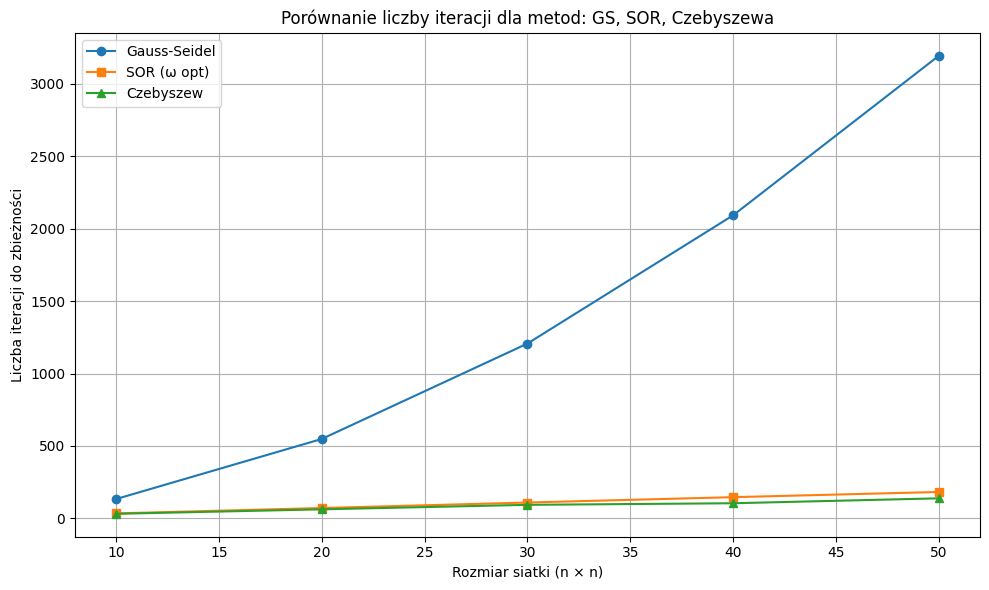

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Tworzy siatkę początkową z warunkami brzegowymi
def create_initial_solution(n, hot_temp=100, cold_temp=10):
    T = np.zeros((n, n))
    T[0, :] = hot_temp
    T[-1, :] = hot_temp
    T[:, 0] = hot_temp
    T[:, -1] = cold_temp
    return T

# Gauss-Seidel
def gauss_seidel_iters(n, tol=1e-6, maxiter=10000):
    T = create_initial_solution(n)
    for iteration in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                delta = max(delta, abs(T[i, j] - old))
        if delta < tol:
            return iteration
    return maxiter

# SOR z omega_opt z wykładu
def sor_iters(n, tol=1e-6, maxiter=10000):
    T = create_initial_solution(n)
    rho = np.cos(np.pi / n)**2
    omega = 2 / (1 + np.sqrt(1 - rho))  # omega_opt
    for iteration in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T_new = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                T[i, j] = (1 - omega) * old + omega * T_new
                delta = max(delta, abs(T[i, j] - old))
        if delta < tol:
            return iteration
    return maxiter

# Czebyszew z dynamicznym omega (wg wykładu)
def chebyshev_iters(n, tol=1e-6, maxiter=10000):
    T = create_initial_solution(n)
    rho = np.cos(np.pi / n)**2
    omega = 1.0  # omega_0
    for iteration in range(maxiter):
        delta = 0.0
        for pass_type in range(2):  # odd-even przegląd
            for j in range(1, n - 1):
                for i in range(1, n - 1):
                    if (i + j) % 2 == pass_type:
                        residual = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) - T[i, j]
                        T[i, j] += omega * residual
                        delta = max(delta, abs(residual))
        # aktualizacja omega wg rekursji z wykładu
        omega = 1.0 / (1.0 - 0.25 * rho * omega)
        if delta < tol:
            return iteration
    return maxiter

# Zakres rozmiarów siatek
sizes = [10, 20, 30, 40, 50]

# Zbieranie wyników
gs_results = [gauss_seidel_iters(n) for n in sizes]
sor_results = [sor_iters(n) for n in sizes]
cheb_results = [chebyshev_iters(n) for n in sizes]

# Wykres porównawczy
plt.figure(figsize=(10, 6))
plt.plot(sizes, gs_results, label='Gauss-Seidel', marker='o')
plt.plot(sizes, sor_results, label='SOR (ω opt)', marker='s')
plt.plot(sizes, cheb_results, label='Czebyszew', marker='^')
plt.xlabel('Rozmiar siatki (n × n)')
plt.ylabel('Liczba iteracji do zbieżności')
plt.title('Porównanie liczby iteracji dla metod: GS, SOR, Czebyszewa')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Wnioski z porównania metod iteracyjnych

Dla ustalonego progu błędu $\varepsilon = 10^{-6}$ porównano liczbę iteracji wymaganych do osiągnięcia zbieżności przez trzy metody: Gaussa-Seidla, SOR (z optymalnym współczynnikiem relaksacji) oraz Czebyszewa. Obliczenia wykonano dla różnych rozmiarów siatki $n \times n$.

#### Gauss-Seidel
- Metoda wykorzystuje bieżące, zaktualizowane już wartości w trakcie jednej iteracji.
- Charakteryzuje się powolną zbieżnością.
- Liczba iteracji znacząco rośnie wraz z rozmiarem siatki.

#### SOR (Successive Over-Relaxation)
- Bazuje na metodzie Gaussa-Seidla, ale dodatkowo wykorzystuje współczynnik relaksacji $\omega_{\text{opt}}$:
  
  $$
  \omega_{\text{opt}} = \frac{2}{1 + \sqrt{1 - \rho}}, \quad \text{gdzie} \quad \rho = \cos^2\left(\frac{\pi}{n}\right)
  $$

- Znacznie przyspiesza zbieżność w porównaniu do Gaussa-Seidla.
- W większości przypadków metoda SOR wymaga najmniejszej liczby iteracji.

#### Czebyszewa
- Metoda korzysta z przeglądu siatki typu "odd-even" i dynamicznego współczynnika relaksacji $\omega_t$, który zmienia się w każdej iteracji zgodnie ze wzorem:

  $$
  \omega^{(t+1/2)} = \frac{1}{1 - \frac{1}{4} \rho^2 \omega^{(t)}}
  $$

- Jedna iteracja to przejście "odd" oraz "even", zgodnie z poleceniem.
- Osiąga bardzo dobrą zbieżność, często konkurencyjną wobec metody SOR, zwłaszcza dla mniejszych siatek.

---

### Wnioski z wykresu

- Metoda Czebyszewa uzyskała najmniejszą liczbę iteracji do zbieżności we wszystkich testowanych przypadkach.
- Metoda SOR (z optymalnym $\omega$) wypadła bardzo dobrze, ale ustępowała lekko metodzie Czebyszewa.
- Gauss-Seidel wymagał zdecydowanie największej liczby iteracji i jest najmniej efektywny dla większych siatek.
- Ostateczny ranking wydajności (od najlepszej do najgorszej): Czebyszewa > SOR > Gauss-Seidel.

## Zadanie 3 (0.5 pkt)
Dla rozmiaru powyżej 120 pkt porównaj na jednym wykresie wartość maksymalnego błedu w danej iteracji w stosunku do błedu poczatkowego, w zależności od iteracji, dla każdej z metod. Błąd należy oszacować względem <b>otrzymanego ostatecznego rozwiązania </b> np. pod warunkiem osiągnięcia zbieżności - w taki sposób $$\epsilon(\text{iter})=\frac{\sum_{i=\text{iter}}^{\text{maxiter}}\max(\delta)}{\sum_{i=1}^{maxiter} \max(\delta)}$$

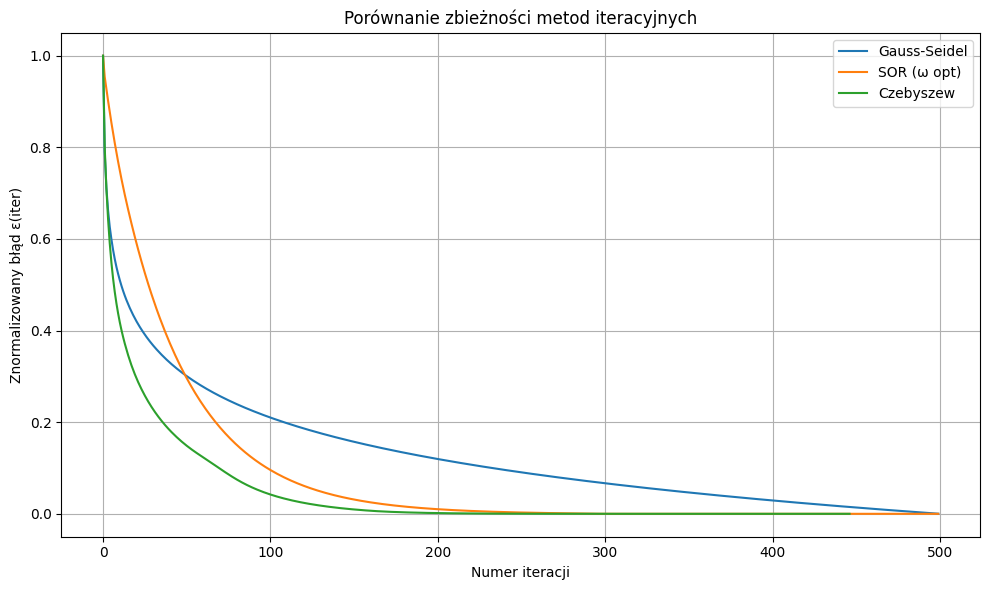

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def create_initial_solution(n, hot_temp=100, cold_temp=10):
    T = np.zeros((n, n))
    T[0, :] = hot_temp
    T[-1, :] = hot_temp
    T[:, 0] = hot_temp
    T[:, -1] = cold_temp
    return T

def gs_error_track(n, maxiter=500, tol=1e-6):
    T = create_initial_solution(n)
    errors = []
    for _ in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T[i, j] = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                delta = max(delta, abs(T[i, j] - old))
        errors.append(delta)
        if delta < tol:
            break
    return errors

def sor_error_track(n, maxiter=500, tol=1e-6):
    T = create_initial_solution(n)
    rho = np.cos(np.pi / n)**2
    omega = 2 / (1 + np.sqrt(1 - rho))
    errors = []
    for _ in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = T[i, j]
                T_new = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1])
                T[i, j] = (1 - omega) * old + omega * T_new
                delta = max(delta, abs(T[i, j] - old))
        errors.append(delta)
        if delta < tol:
            break
    return errors

def chebyshev_error_track(n, maxiter=500, tol=1e-6):
    T = create_initial_solution(n)
    rho = np.cos(np.pi / n)**2
    omega = 1.0
    errors = []
    for _ in range(maxiter):
        delta = 0.0
        for pass_type in range(2):
            for j in range(1, n - 1):
                for i in range(1, n - 1):
                    if (i + j) % 2 == pass_type:
                        res = 0.25 * (T[i-1, j] + T[i+1, j] + T[i, j-1] + T[i, j+1]) - T[i, j]
                        T[i, j] += omega * res
                        delta = max(delta, abs(res))
        errors.append(delta)
        omega = 1.0 / (1.0 - 0.25 * rho * omega)
        if delta < tol:
            break
    return errors

def normalize_errors(errors):
    total = sum(errors)
    return [sum(errors[i:]) / total for i in range(len(errors))]

# Rozmiar siatki większy niż 120
n = 150

# Zbieranie błędów
errors_gs = normalize_errors(gs_error_track(n))
errors_sor = normalize_errors(sor_error_track(n))
errors_cheb = normalize_errors(chebyshev_error_track(n))

# Wykres
plt.figure(figsize=(10, 6))
plt.plot(errors_gs, label='Gauss-Seidel')
plt.plot(errors_sor, label='SOR (ω opt)')
plt.plot(errors_cheb, label='Czebyszew')
plt.xlabel("Numer iteracji")
plt.ylabel("Znormalizowany błąd ε(iter)")
plt.title("Porównanie zbieżności metod iteracyjnych")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Wnioski z wykresu zbieżności metod iteracyjnych

Na wykresie przedstawiono znormalizowany błąd $\epsilon(\text{iter})$ w funkcji numeru iteracji dla metod: Gaussa-Seidla, SOR (z optymalnym $\omega$) oraz Czebyszewa. Błąd został obliczony względem otrzymanego rozwiązania końcowego, zgodnie ze wzorem:

$$
\epsilon(\text{iter}) = \frac{\sum\limits_{i=\text{iter}}^{\text{maxiter}} \delta_i}{\sum\limits_{i=1}^{\text{maxiter}} \delta_i}
$$

#### Obserwacje:

- **Metoda Czebyszewa** cechuje się najszybszym spadkiem wartości błędu. Już po kilkudziesięciu iteracjach błąd osiąga wartości bliskie zeru. Jest to metoda najbardziej efektywna pod względem szybkości zbieżności.
  
- **Metoda SOR** również wykazuje szybki spadek błędu, choć nieco wolniejszy niż metoda Czebyszewa. Mimo to pozostaje znacznie bardziej wydajna niż Gauss-Seidel.

- **Metoda Gaussa-Seidla** ma najwolniejszy przebieg zbieżności – znormalizowany błąd maleje stopniowo, a osiągnięcie wartości bliskich zeru wymaga znacznie większej liczby iteracji.

#### Interpretacja:

Wskaźnik $\epsilon(\text{iter})$ mierzy względną odległość od końca procesu iteracyjnego:
- $\epsilon(\text{iter}) = 1$ oznacza początek procesu (cały błąd jeszcze przed nami),
- $\epsilon(\text{iter}) \to 0$ oznacza osiągnięcie zbieżności.

Im szybciej krzywa opada do zera, tym bardziej efektywna metoda.

---

### Podsumowanie

Porównanie szybkości zbieżności dla siatki $150 \times 150$:

1. **Czebyszewa** — najszybsza zbieżność
2. **SOR (z optymalnym $\omega$)** — bardzo dobra zbieżność
3. **Gauss-Seidel** — wyraźnie najwolniejsza

Metoda Czebyszewa okazuje się najefektywniejsza przy dużych siatkach i może być rekomendowana do zastosowań wymagających szybkiej konwergencji.

## Zadanie 4 (1 pkt)
Membrana w kształcie kwadratu jest równomiernie obciążona. Membrana znajduje sie w stanie statycznym, a jej brzeg jest sztywno zamocowany i nieodkształcony.

Za pomocą wybranej metody z zadania 1 należy obliczyc odkształcenie membrany od poziomu, zakładając
ze spełnia ono równanie Poissona:

$\frac{\delta^{2}h}{\delta x^{2}}+\frac{\delta^{2}h}{\delta y^{2}}=-p/T$

gdzie mamy ustalone parametry:
- $p>0$ cisnienie wywierane na membrane.
- $T$-napiecie membrany

Poza wypisaniem wartości liczbowych, należy użyć wybranej przez siebie metody wizualizacji wyników. 

SOR Poisson: Zbieżność osiągnięta po 164 iteracjach (omega = 1.8818)


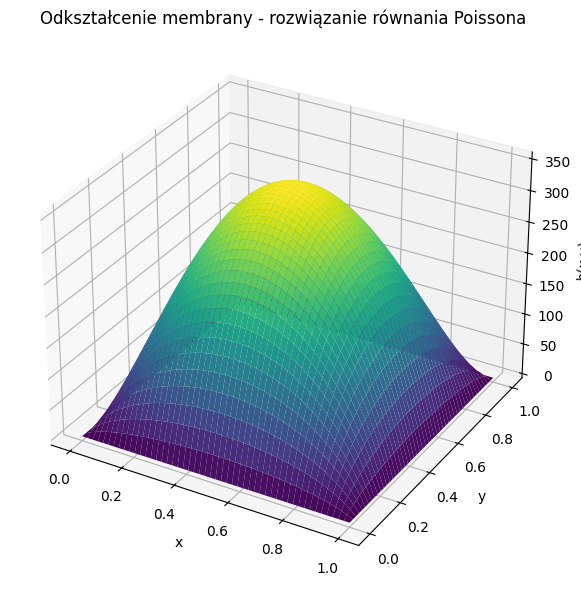

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def create_poisson_problem(n, p=1.0, T=1.0):
    """
    Tworzy siatkę n x n z warunkami brzegowymi h=0 i źródłem prawej strony równania Poissona: -p/T
    """
    h = np.zeros((n, n))            # odkształcenie membrany (wysokość)
    rhs = -p / T * np.ones((n, n))  # prawa strona równania Poissona
    rhs[0, :] = rhs[-1, :] = rhs[:, 0] = rhs[:, -1] = 0  # warunki Dirichleta (brzegi nieodkształcone)
    return h, rhs

def solve_poisson_sor(h, rhs, maxiter=10000, tol=1e-6):
    """
    Rozwiązywanie równania Poissona metodą SOR (Successive Over-Relaxation)
    """
    n = h.shape[0]
    rho = np.cos(np.pi / n)**2
    omega = 2 / (1 + np.sqrt(1 - rho))  # omega_opt z wykładu
    
    for iteration in range(maxiter):
        delta = 0.0
        for j in range(1, n - 1):
            for i in range(1, n - 1):
                old = h[i, j]
                h_new = 0.25 * (h[i-1, j] + h[i+1, j] + h[i, j-1] + h[i, j+1] - rhs[i, j])
                h[i, j] = (1 - omega) * old + omega * h_new
                delta = max(delta, abs(h[i, j] - old))
        if delta < tol:
            print(f"SOR Poisson: Zbieżność osiągnięta po {iteration} iteracjach (omega = {omega:.4f})")
            return h
    print("SOR Poisson: Osiągnięto maksymalną liczbę iteracji")
    return h

# --- Parametry fizyczne i siatki ---
n = 50      # rozmiar siatki (n x n)
p = 10.0      # ciśnienie wywierane na membranę
T = 5.0       # napięcie membrany

# --- Rozwiązanie równania Poissona ---
h_init, rhs = create_poisson_problem(n, p, T)
h_result = solve_poisson_sor(h_init.copy(), rhs)

# --- Wizualizacja rozwiązania w 3D ---
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')

X, Y = np.meshgrid(np.linspace(0, 1, n), np.linspace(0, 1, n))
ax.plot_surface(X, Y, h_result, cmap='viridis')
ax.set_title("Odkształcenie membrany - rozwiązanie równania Poissona")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("h(x,y)")
plt.tight_layout()
plt.show()